In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.semi_supervised import LabelPropagation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN

data=pd.read_csv("../data/permanencia_ingenierias_modificado.csv", sep=';', encoding='latin_1',decimal=",")
data.head()

,Edad,ALERTASROJAS,ALERTASNARANJAS,ALERTASMANUALES,CAL.PSICOSOCIAL,CAL.FAMILIAR,CAL.SOCIECONOMICO,CAL.ACADEMICO,CRÉDITOS REPROBADOS,CRÉDITOS APROBADOS,...,DESERSIÓN,Advertencia académica,Estado académico normal,Primer reingreso,Segunda suspensión académica,Segundo reingreso,Suspensión académica,SEXO_F,SEXO_M,SEXO_N
0,21,14,17,0,10.31,28.21,22.37,10.61,3,65,...,0,False,True,False,False,False,False,False,True,False
1,21,14,15,0,5.15,28.21,22.37,15.15,15,84,...,0,False,True,False,False,False,False,True,False,False
2,19,13,19,0,8.25,28.21,21.05,15.15,6,8,...,1,True,False,False,False,False,False,True,False,False
3,20,12,18,0,9.28,35.9,15.79,10.61,3,44,...,0,False,True,False,False,False,False,True,False,False
4,20,12,14,0,10.31,17.95,23.68,4.55,0,149,...,0,False,True,False,False,False,False,True,False,False


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Edad                           914 non-null    int64 
 1   ALERTASROJAS                   914 non-null    int64 
 2   ALERTASNARANJAS                914 non-null    int64 
 3   ALERTASMANUALES                914 non-null    int64 
 4   CAL.PSICOSOCIAL                914 non-null    object
 5   CAL.FAMILIAR                   914 non-null    object
 6   CAL.SOCIECONOMICO              914 non-null    object
 7   CAL.ACADEMICO                  914 non-null    object
 8   CRÉDITOS REPROBADOS            914 non-null    int64 
 9   CRÉDITOS APROBADOS             914 non-null    int64 
 10  CRÉDITOS CANCELADOS            914 non-null    int64 
 11  CREDITOS INTENTADOS            914 non-null    int64 
 12  PROMEDIO GLOBAL                914 non-null    object
 13  APOYO

In [20]:
data.describe(include='all')

,Edad,ALERTASROJAS,ALERTASNARANJAS,ALERTASMANUALES,CAL.PSICOSOCIAL,CAL.FAMILIAR,CAL.SOCIECONOMICO,CAL.ACADEMICO,CRÉDITOS REPROBADOS,CRÉDITOS APROBADOS,...,DESERSIÓN,Advertencia académica,Estado académico normal,Primer reingreso,Segunda suspensión académica,Segundo reingreso,Suspensión académica,SEXO_F,SEXO_M,SEXO_N
count,914.000000,914.000000,914.000000,914.000000,914,914,914,914,914.000000,914.000000,...,914.000000,914,914,914,914,914,914,914,914,914
unique,NaN,NaN,NaN,NaN,24,19,28,21,NaN,NaN,...,NaN,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,2.06,7.69,3.95,4.55,NaN,NaN,...,NaN,False,True,False,False,False,False,False,True,False
freq,NaN,NaN,NaN,NaN,112,140,84,119,NaN,NaN,...,NaN,784,739,901,908,912,890,639,636,911
mean,19.217724,4.986871,13.610503,0.003282,NaN,NaN,NaN,NaN,5.240700,43.004376,...,0.124726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.008109,3.803475,5.451905,0.057228,NaN,NaN,NaN,NaN,7.456559,36.629879,...,0.330589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18.000000,2.000000,10.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,15.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,19.000000,4.000000,13.000000,0.000000,NaN,NaN,NaN,NaN,3.000000,34.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,20.000000,7.000000,17.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,56.750000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Drop column redudants

In [21]:
#A partir de la redundancia encontrada, eliminaremos ciertas variables: 
data=data.drop(['ALERTASMANUALES', 'ALERTASNARANJAS', 'ALERTASROJAS', 'CREDITOS INTENTADOS', #Redundantes y algunas no aportan información
                'Edad', 'SEXO_N', 'SEXO_M',  'SEXO_F', #Irrelevantes, no aportan información
                'APOYO INSTITUCIONAL', 'Primer reingreso', 'Segundo reingreso', 'CAL.ACADEMICO', 
                'CAL.SOCIECONOMICO', 'Segunda suspensión académica', 'CAL.FAMILIAR'], axis=1) #Irrelevantes
data.head()   

,CAL.PSICOSOCIAL,CRÉDITOS REPROBADOS,CRÉDITOS APROBADOS,CRÉDITOS CANCELADOS,PROMEDIO GLOBAL,APOYOS ECONÓMICO EN MATRICULA,DESERSIÓN,Advertencia académica,Estado académico normal,Suspensión académica
0,10.31,3,65,0,3.832058824,1,0,False,True,False
1,5.15,15,84,9,3.614646465,1,0,False,True,False
2,8.25,6,8,3,2.855,1,1,True,False,False
3,9.28,3,44,3,3.80893617,1,0,False,True,False
4,10.31,0,149,4,4.202684564,1,0,False,True,False


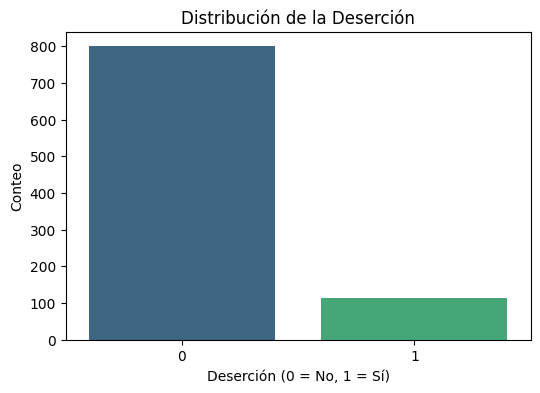

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='DESERSIÓN', palette='viridis')
plt.title('Distribución de la Deserción')
plt.xlabel('Deserción (0 = No, 1 = Sí)')
plt.ylabel('Conteo')
plt.show()

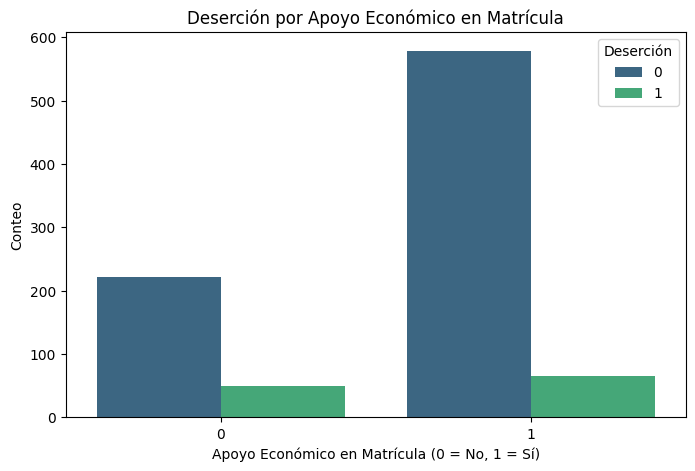

In [23]:
# 2. Distribución de apoyo económico en matrícula por deserción
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='APOYOS ECONÓMICO EN MATRICULA', hue='DESERSIÓN', palette='viridis')
plt.title('Deserción por Apoyo Económico en Matrícula')
plt.xlabel('Apoyo Económico en Matrícula (0 = No, 1 = Sí)')
plt.ylabel('Conteo')
plt.legend(title='Deserción')
plt.show()

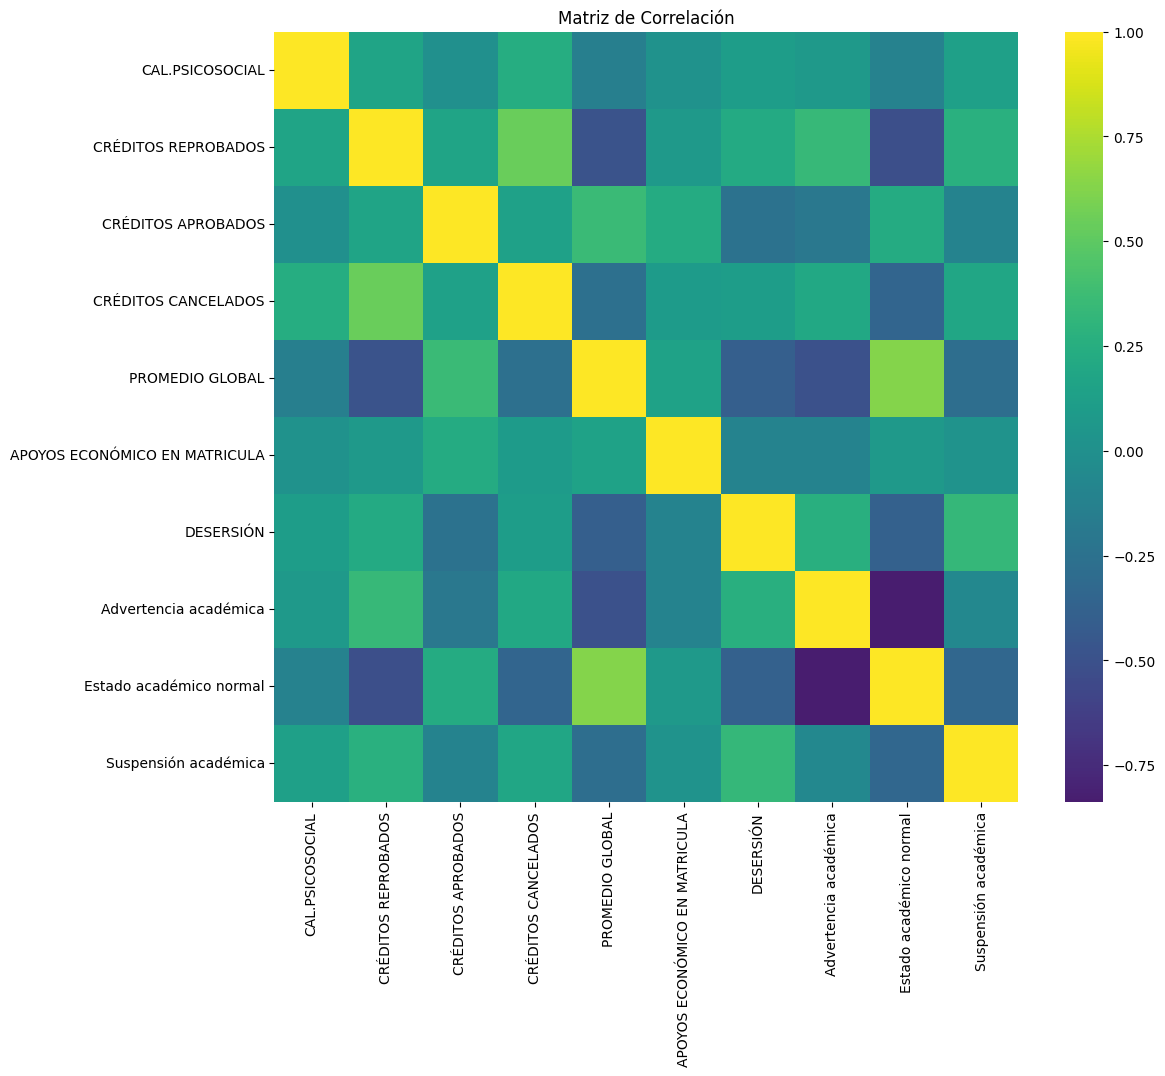

In [24]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='viridis', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [25]:
labelencoder = LabelEncoder() 

data['DESERSIÓN'] = labelencoder.fit_transform(data['DESERSIÓN'])

data.head()

,CAL.PSICOSOCIAL,CRÉDITOS REPROBADOS,CRÉDITOS APROBADOS,CRÉDITOS CANCELADOS,PROMEDIO GLOBAL,APOYOS ECONÓMICO EN MATRICULA,DESERSIÓN,Advertencia académica,Estado académico normal,Suspensión académica
0,10.31,3,65,0,3.832058824,1,0,False,True,False
1,5.15,15,84,9,3.614646465,1,0,False,True,False
2,8.25,6,8,3,2.855,1,1,True,False,False
3,9.28,3,44,3,3.80893617,1,0,False,True,False
4,10.31,0,149,4,4.202684564,1,0,False,True,False


In [26]:
X = data.drop("DESERSIÓN", axis = 1) # Variables predictoras

Y = data['DESERSIÓN'] #Variable objetivo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)



conjunto_entrenamiento=pd.concat([X_train, Y_train], axis=1) #concatenar lo terin en un data frame

conjunto_entrenamiento.head()

,CAL.PSICOSOCIAL,CRÉDITOS REPROBADOS,CRÉDITOS APROBADOS,CRÉDITOS CANCELADOS,PROMEDIO GLOBAL,APOYOS ECONÓMICO EN MATRICULA,Advertencia académica,Estado académico normal,Suspensión académica,DESERSIÓN
345,9.28,6,34,12,3.3685,1,True,False,False,0
60,0.0,0,52,3,3.705,1,False,True,False,0
300,2.06,18,2,13,0.944,0,False,False,False,0
501,10.31,0,15,0,4.023333333,1,False,True,False,0
324,8.25,2,6,9,3.4375,1,False,True,False,1


In [27]:
var_predictoras= data.drop("DESERSIÓN", axis = 1)

var_objetivo=data["DESERSIÓN"]

model = LabelPropagation(kernel='knn', n_neighbors=50)

model.fit(var_predictoras, var_objetivo)

LabelPropagation(kernel='knn', n_neighbors=50)

Precisión del modelo: 0.89

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       800
           1       0.78      0.16      0.26       114

    accuracy                           0.89       914
   macro avg       0.84      0.58      0.60       914
weighted avg       0.88      0.89      0.86       914



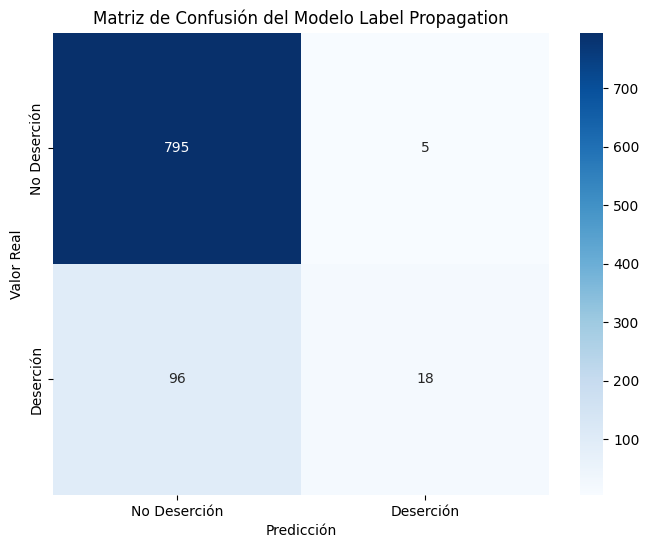

In [28]:
# Realizar predicciones
predicciones = model.predict(var_predictoras)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(var_objetivo, predicciones)
print(f"Precisión del modelo: {accuracy:.2f}")

# Imprimir reporte de clasificación
print("\nReporte de Clasificación:\n", classification_report(var_objetivo, predicciones))

# Graficar la matriz de confusión
conf_matrix = confusion_matrix(var_objetivo, predicciones)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Deserción', 'Deserción'], yticklabels=['No Deserción', 'Deserción'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo Label Propagation')
plt.show()

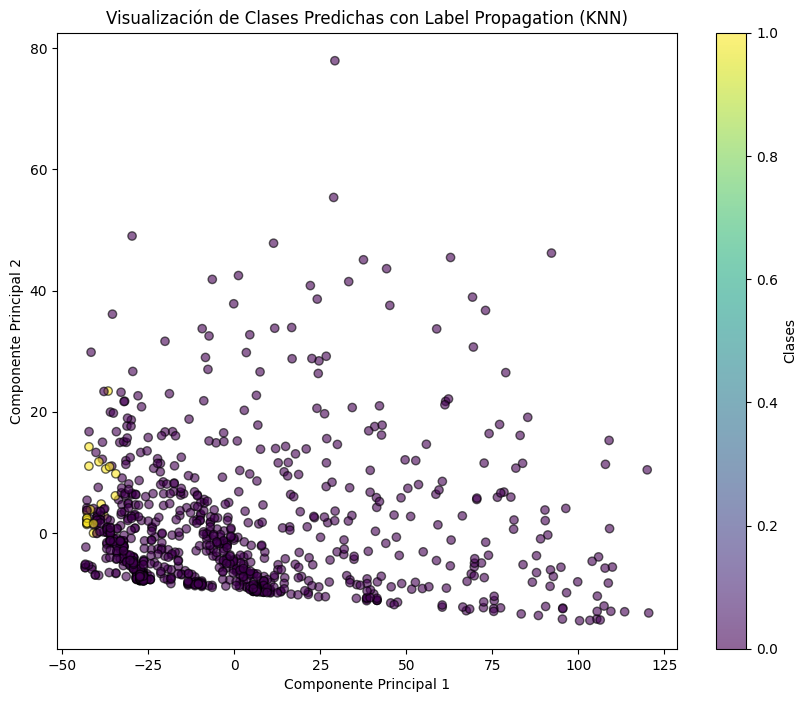

In [29]:
pca = PCA(n_components=2)
var_predictoras_2D = pca.fit_transform(var_predictoras)

# Obtener las etiquetas predichas por el modelo
predicciones = model.predict(var_predictoras)

# Graficar los datos
plt.figure(figsize=(10, 8))
plt.scatter(var_predictoras_2D[:, 0], var_predictoras_2D[:, 1], c=predicciones, cmap='viridis', alpha=0.6, edgecolor='k')
plt.title("Visualización de Clases Predichas con Label Propagation (KNN)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Clases")
plt.show()

In [30]:
smote_enn = SMOTEENN(random_state=42)
X_train_bal, Y_train_bal = smote_enn.fit_resample(X_train, Y_train)

print("Distribución después de balanceo combinado:\n", Y_train_bal.value_counts())

Distribución después de balanceo combinado:
 DESERSIÓN
1    477
0    364
Name: count, dtype: int64


Precisión del modelo: 0.78


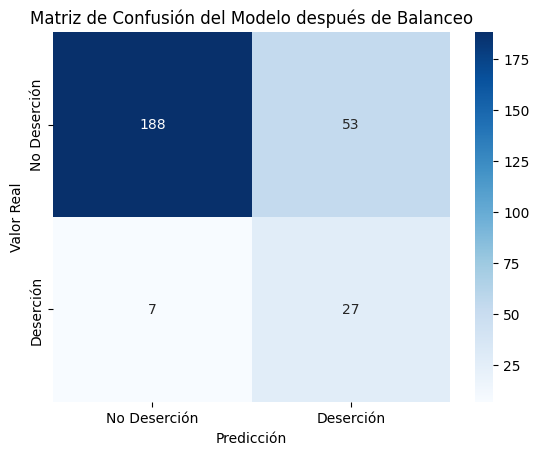

In [31]:
model = LabelPropagation(kernel='knn', n_neighbors=50)
model.fit(X_train_bal, Y_train_bal)

# Realizar predicciones y evaluar el rendimiento en el conjunto de prueba
predicciones = model.predict(X_test)
accuracy = accuracy_score(Y_test, predicciones)
print(f"Precisión del modelo: {accuracy:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, predicciones)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Deserción', 'Deserción'], yticklabels=['No Deserción', 'Deserción'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo después de Balanceo')
plt.show()

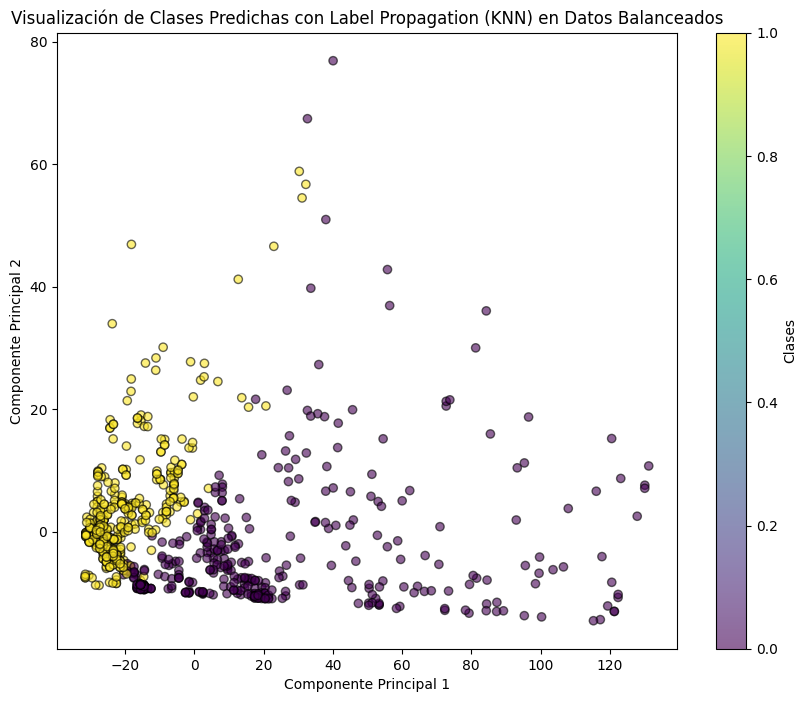

In [32]:
 # Reducir las variables predictoras balanceadas a 2 dimensiones para la visualización
pca = PCA(n_components=2)
X_train_bal_2D = pca.fit_transform(X_train_bal)

# Obtener las etiquetas predichas por el modelo entrenado
predicciones_bal = model.predict(X_train_bal)

# Graficar los datos balanceados con las clases predichas
plt.figure(figsize=(10, 8))
plt.scatter(X_train_bal_2D[:, 0], X_train_bal_2D[:, 1], c=predicciones_bal, cmap='viridis', alpha=0.6, edgecolor='k')
plt.title("Visualización de Clases Predichas con Label Propagation (KNN) en Datos Balanceados")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Clases")
plt.show()